### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [2]:
!pip install scikit-learn -U

    100% |████████████████████████████████| 20.0MB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   67% |█████████████████████▌          | 9.0MB 68.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [4]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [2]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [65]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

    100% |████████████████████████████████| 1.6MB 5.0MB/s ta 0:00:011


# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [3]:
# Load in the general demographics data.
demographics = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')
# Load in the feature summary file.
feature_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';', error_bad_lines=False)
# https://stackoverflow.com/questions/53256091/how-can-i-fix-error-tokenizing-data-on-pandas-csv-reader


In [7]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(demographics.shape)
print(feature_info.shape)


(891221, 85)
(85, 4)


In [8]:
demographics.head().transpose()

,0,1,2,3,4
AGER_TYP,-1,-1,-1,2,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3
ANREDE_KZ,1,2,2,2,1
CJT_GESAMTTYP,2,5,3,2,5
FINANZ_MINIMALIST,3,1,1,4,4
FINANZ_SPARER,4,5,4,2,3
FINANZ_VORSORGER,3,2,1,5,4
FINANZ_ANLEGER,5,5,2,2,1
FINANZ_UNAUFFAELLIGER,5,4,3,1,3
FINANZ_HAUSBAUER,3,5,5,2,2


In [9]:
feature_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
# count the number of NaNs in dataframe demographics
demographics.isna().sum().sum()

4896838

In [4]:
# Identify missing or unknown data values and convert them to NaNs.
def str_to_list(str):
    l = []
    l2 = str[1:-1].split(',')
    for i in l2:
        try:
            l.append(int(i))
        except:
            l.append(i)
    return l

In [12]:
# Parse the column 'missing_or_unknown' adding a column 'NAN' of type list
feature_info['NAN'] = feature_info['missing_or_unknown'].apply(str_to_list)
print(feature_info.head())

              attribute information_level         type missing_or_unknown  \
0              AGER_TYP            person  categorical             [-1,0]   
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]   
2             ANREDE_KZ            person  categorical             [-1,0]   
3         CJT_GESAMTTYP            person  categorical                [0]   
4     FINANZ_MINIMALIST            person      ordinal               [-1]   

          NAN  
0     [-1, 0]  
1  [-1, 0, 9]  
2     [-1, 0]  
3         [0]  
4        [-1]  


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [13]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
demographics.isna().sum()


AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

In [14]:
# Investigate patterns in the amount of missing data in each column.
attribute_index = feature_info.set_index('attribute')
attribute_index.head()


,information_level,type,missing_or_unknown,NAN
attribute,,,,
AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
CJT_GESAMTTYP,person,categorical,[0],[0]
FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [15]:
na_demographics = demographics[:]

In [16]:
# Replace the missing or unknown values in columns with NaN
for column in na_demographics.columns:
    na_demographics[column].replace(attribute_index.loc[column].loc['NAN'], np.NaN, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
# How many NaN values do we have now?
na_demographics.isna().sum().sum()

8373929

In [18]:
na_demographics.isna().sum()

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

In [19]:
na_demographics_df = na_demographics.isna().sum().reset_index()
na_demographics_df.head()

,index,0
0,AGER_TYP,685843
1,ALTERSKATEGORIE_GROB,2881
2,ANREDE_KZ,0
3,CJT_GESAMTTYP,4854
4,FINANZ_MINIMALIST,0


In [20]:
# Sorting the the na_demograpichs_df according to number of NaNs
# Printing out the 10 largest number of NaNs
na_demographics_df.sort_values(by=0,ascending=True,inplace=True)
na_demographics_df.tail(10)

,index,0
63,KBA05_ANTG4,133324
48,W_KEIT_KIND_HH,147988
70,KKK,158064
73,REGIOTYP,158064
43,ALTER_HH,310267
11,GEBURTSJAHR,392318
64,KBA05_BAUMAX,476524
47,KK_KUNDENTYP,584612
0,AGER_TYP,685843
40,TITEL_KZ,889061


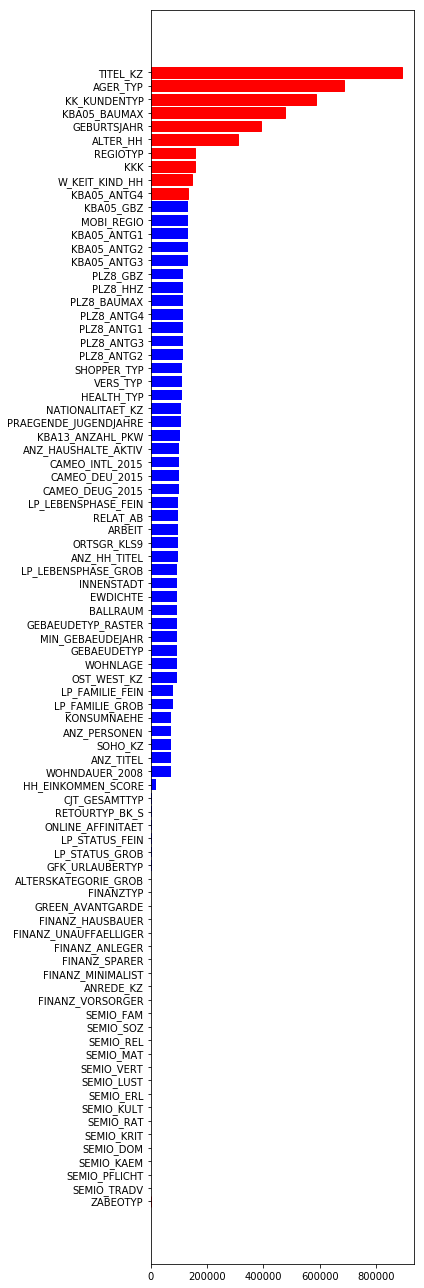

In [21]:
# plotting na_demographics_df in sorted fashion
plt.figure(figsize=(6,18))
barh = plt.barh(range(len(na_demographics_df[0])),na_demographics_df[0],color = 'blue', tick_label=na_demographics_df['index'])
for i in range(11):    
    barh[-i].set_color('red')
plt.tight_layout()

In [22]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
# The graph above show that there 6 columns that can viewed as outliers.

outliers=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']
na_demographics.drop(labels=outliers,axis=1,inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
na_demographics.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

There are six columns that have substantially more NaNs than the other columns. These columns are:
* 'TITEL_KZ'
* 'AGER_TYP'
* 'KK_KUNDENTYPE'
* 'KBA05_BAUMAX'
* 'GEBURTSJAHR'
* 'ALTERT_HH'
These columns are sorted at the top of the graph.

All of these columns are removed from the dataset.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [24]:
# How much data is missing in each row of the dataset?
# Creating a column that contains the count of NA values in each row
na_demographics['no_na_row'] = na_demographics.isna().sum(axis=1)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
na_demographics['no_na_row']

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
30        34
31         0
32         0
33         0
34         4
35        43
36         0
37         0
38         0
39         5
40         4
41         0
42         2
43         0
44         0
45         0
46        40
47         0
48        47
49         0
          ..
891171    34
891172    16
891173    19
891174     0
891175    47
891176     0
891177     0
891178     0
891179     0
891180     0
891181     3
891182     0
891183     0
891184     8
891185    47
891186     0
891187    47
891188     0
891189     0
891190     0
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0

(array([ 96415.,  60529.,  12134.,   5139.,    480.,    155.,  14016.,
          5031.,  28038.,  46075.]),
 array([  1. ,   5.8,  10.6,  15.4,  20.2,  25. ,  29.8,  34.6,  39.4,
         44.2,  49. ]),
 <a list of 10 Patch objects>)

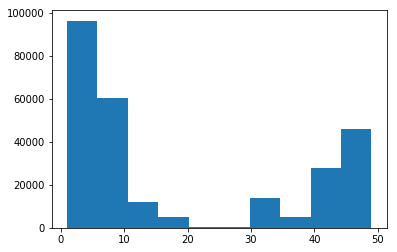

In [26]:
# Plot a histogram over the distribution of NaNs in the rows.
plt.hist(na_demographics[na_demographics['no_na_row']>0]['no_na_row'],bins=10)

There is a significant number of rows with 30-50 NA values. We will split the data into two subsets: one with rows with less than or equal to 30 NA values `na_demographics_b30` and one with rows greater than 30 NA values `na_demographics_g30`.

In [27]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
na_demographics_b30 = na_demographics[na_demographics['no_na_row']<=30]
na_demographics_g30 = na_demographics[na_demographics['no_na_row']>30]

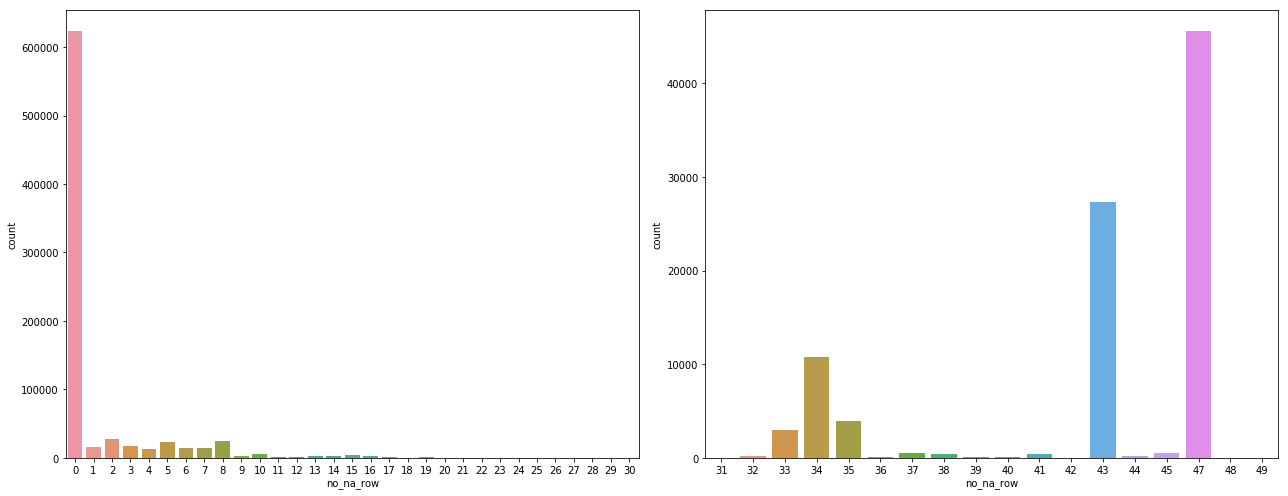

In [28]:
# Plot a countplot of the distribution of NaN for the two subsets.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
sns.countplot(x='no_na_row',data=na_demographics_b30,ax=ax1,orient='v')
sns.countplot(x='no_na_row',data=na_demographics_g30,ax=ax2,orient='v')
plt.tight_layout()

In [ ]:
prop_g_30 = len(na_demographics_g30)/len(na_demographics)
print(f'{prop_g_30*100:.2f}% of our data has more than 30 missing values in a row.')
prop_b_30 = len(na_demographics_b30)/len(na_demographics)
print(f'{prop_b_30*100:.2f}% of our data has less then 30 missing values in a row.')

In [29]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# The steps taken for comparing the subsets are inspired by:
# http://patrickdeguzman.me/notebooks/Identify_Customer_Segments.html

def compare_columns(df1, df2, column, df1_desc, df2_desc):
    ''' Takes two dataframes and a column name as input.
        Plots the countplots of the given column from both dataframes.
        def compare_columns(df1,df2,column,df1_desc=None,df2_desc=None):
    '''
    
    # Taking max value count between the 2 columns to set as ylim for both plots
    df1_max = df1[column].value_counts().iloc[0]
    df2_max = df2[column].value_counts().iloc[0]
    if df1_max > df2_max:
        top = df1_max * 1.05
    else:
        top = df2_max * 1.05
        
    # plotting
    fig,(ax1, ax2) = plt.subplots(1,2,figsize=(10,3))
    sns.countplot(df1[column], ax=ax1)
    ax1.set_ylabel('Count')
    ax1.set_ylim(top=top)
    ax1.set_title(df1_desc)
    sns.countplot(df2[column], ax=ax2)
    ax2.set_ylabel('Count')
    ax2.set_ylim(top=top)
    ax2.set_title(df2_desc)
    plt.tight_layout()
    


Below are plots of five columns with no missing values. Plots on the left are from the subset of data with less than 30 NA values in each row and the plots on the right are from the subset of data wit more than 30 NA values in each row.

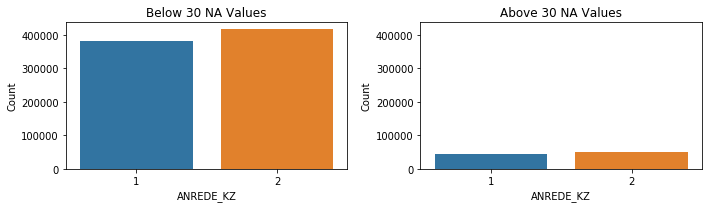

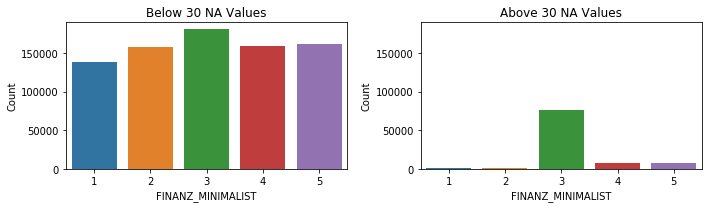

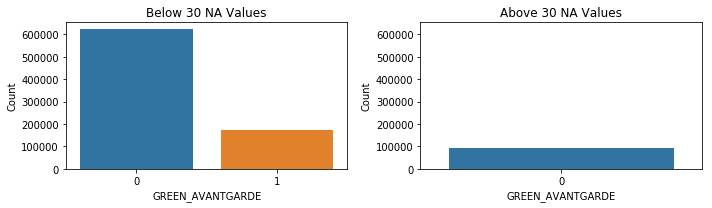

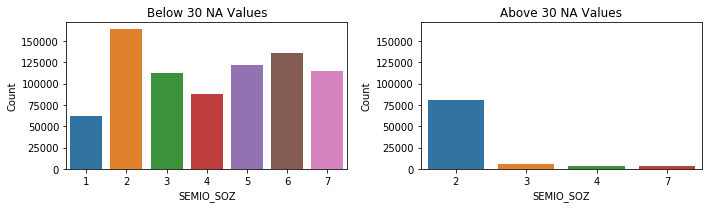

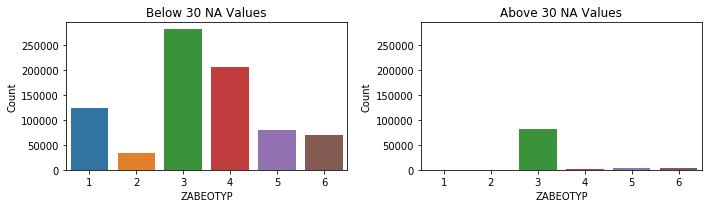

In [30]:
for n in ['ANREDE_KZ','FINANZ_MINIMALIST','GREEN_AVANTGARDE','SEMIO_SOZ','ZABEOTYP']:
    compare_columns(na_demographics_b30,na_demographics_g30,n,"Below 30 NA Values","Above 30 NA Values")

#### Discussion 1.1.3: Assess Missing Data in Each Row

The data with more than 30 NaN values is 10.46% of the total data. The plots shows us that the distribution of values between the subsets (the one with less than 30 NaNB values and the one with more than 30 NA values) are very different. The distribution of values between the two subsets of data are different for all of the columns above with the exception of column "ANREDE_KZ". We will drop the rows with more than 30 NaNs and continue with the subset
na_demographcis_b30, which have rows with less than 30 NaN values.

In [31]:
print(na_demographics_b30.shape)
print(na_demographics_g30.shape)

(798067, 80)
(93154, 80)


In [32]:
# drop the 'no_na_row' of the dataset with less than 30 NaNs in the rows
na_demographics_b30.drop('no_na_row',inplace=True, axis=1)
demographics_1 =  na_demographics_b30[:]
print(demographics_1.shape)

(798067, 79)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
demographics_1.head().transpose()

,1,2,3,4,5
ALTERSKATEGORIE_GROB,1,3,4,3,1
ANREDE_KZ,2,2,2,1,2
CJT_GESAMTTYP,5,3,2,5,2
FINANZ_MINIMALIST,1,1,4,4,3
FINANZ_SPARER,5,4,2,3,1
FINANZ_VORSORGER,2,1,5,4,5
FINANZ_ANLEGER,5,2,2,1,2
FINANZ_UNAUFFAELLIGER,4,3,1,3,2
FINANZ_HAUSBAUER,5,5,2,2,5
FINANZTYP,1,1,6,5,2


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [34]:
# Removing the 6 outlier columns that were removed from the feature_info dataframe
print(feature_info.shape)
feature_info = feature_info.set_index('attribute').drop(outliers).reset_index()
print(feature_info.shape)

(85, 5)
(79, 5)


In [35]:
# How many features are there of each data type?
feature_info['type'].value_counts()


ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

In [36]:
# Creating a dictionary where the 4 data types above are the keys and the corresponding DF columns are the values
df_dtype = {}
dtypes = ['ordinal','categorical','numeric','mixed']
for d in dtypes:
    df_dtype[d]=feature_info[feature_info['type']==d]['attribute']

In [37]:
print(df_dtype)

{'ordinal': 0      ALTERSKATEGORIE_GROB
3         FINANZ_MINIMALIST
4             FINANZ_SPARER
5          FINANZ_VORSORGER
6            FINANZ_ANLEGER
7     FINANZ_UNAUFFAELLIGER
8          FINANZ_HAUSBAUER
12               HEALTH_TYP
21           RETOURTYP_BK_S
22                SEMIO_SOZ
23                SEMIO_FAM
24                SEMIO_REL
25                SEMIO_MAT
26               SEMIO_VERT
27               SEMIO_LUST
28                SEMIO_ERL
29               SEMIO_KULT
30                SEMIO_RAT
31               SEMIO_KRIT
32                SEMIO_DOM
33               SEMIO_KAEM
34            SEMIO_PFLICHT
35              SEMIO_TRADV
42       HH_EINKOMMEN_SCORE
43           W_KEIT_KIND_HH
44           WOHNDAUER_2008
48              KONSUMNAEHE
55              KBA05_ANTG1
56              KBA05_ANTG2
57              KBA05_ANTG3
58              KBA05_ANTG4
59                KBA05_GBZ
60                 BALLRAUM
61                 EWDICHTE
62               INNENSTADT
63      

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

#####  Ordinal

In [38]:
def check_unique_vals(df):
    for col in df.columns:
        values = list(df[col].unique())
        print(f'{col}: {values}')

In [39]:
check_unique_vals(demographics_1[df_dtype['ordinal']])

ALTERSKATEGORIE_GROB: [1.0, 3.0, 4.0, 2.0, nan]
FINANZ_MINIMALIST: [1, 4, 3, 2, 5]
FINANZ_SPARER: [5, 4, 2, 3, 1]
FINANZ_VORSORGER: [2, 1, 5, 4, 3]
FINANZ_ANLEGER: [5, 2, 1, 4, 3]
FINANZ_UNAUFFAELLIGER: [4, 3, 1, 2, 5]
FINANZ_HAUSBAUER: [5, 2, 3, 4, 1]
HEALTH_TYP: [3.0, 2.0, 1.0, nan]
RETOURTYP_BK_S: [1.0, 3.0, 2.0, 5.0, 4.0, nan]
SEMIO_SOZ: [5, 4, 6, 2, 7, 3, 1]
SEMIO_FAM: [4, 1, 5, 7, 2, 6, 3]
SEMIO_REL: [4, 3, 2, 7, 5, 1, 6]
SEMIO_MAT: [3, 1, 2, 4, 7, 5, 6]
SEMIO_VERT: [1, 4, 7, 2, 6, 5, 3]
SEMIO_LUST: [2, 4, 6, 7, 3, 1, 5]
SEMIO_ERL: [2, 6, 7, 4, 5, 1, 3]
SEMIO_KULT: [3, 4, 6, 5, 7, 1, 2]
SEMIO_RAT: [6, 4, 3, 2, 7, 5, 1]
SEMIO_KRIT: [4, 7, 3, 1, 5, 6, 2]
SEMIO_DOM: [7, 4, 2, 1, 5, 6, 3]
SEMIO_KAEM: [4, 7, 5, 2, 3, 6, 1]
SEMIO_PFLICHT: [7, 3, 4, 5, 1, 6, 2]
SEMIO_TRADV: [6, 3, 4, 2, 7, 5, 1]
HH_EINKOMMEN_SCORE: [6.0, 4.0, 1.0, 5.0, 3.0, 2.0]
W_KEIT_KIND_HH: [3.0, nan, 2.0, 6.0, 5.0, 4.0, 1.0]
WOHNDAUER_2008: [9.0, 8.0, 3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 1.0]
KONSUMNAEHE: [1.0, 5.0, 4.0, 

The ordinals look okay.

##### Categorical

In [40]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
# Printing and tracking binary and multi-level categorical values 

binary_categories = []
multi_level_categories = []
for col in demographics_1[df_dtype['categorical']]:
    values = demographics_1[df_dtype['categorical']][col].nunique()
    if values == 2:
        binary_categories.append(col)
    else:
        multi_level_categories.append(col)
    print(f'{col}: {values}')


ANREDE_KZ: 2
CJT_GESAMTTYP: 6
FINANZTYP: 6
GFK_URLAUBERTYP: 12
GREEN_AVANTGARDE: 2
LP_FAMILIE_FEIN: 11
LP_FAMILIE_GROB: 5
LP_STATUS_FEIN: 10
LP_STATUS_GROB: 5
NATIONALITAET_KZ: 3
SHOPPER_TYP: 4
SOHO_KZ: 2
VERS_TYP: 2
ZABEOTYP: 6
GEBAEUDETYP: 7
OST_WEST_KZ: 2
CAMEO_DEUG_2015: 9
CAMEO_DEU_2015: 44


In [41]:
# Examining our binary categorical values
demographics_1[binary_categories].head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,W
2,2,1,0.0,1.0,W
3,2,0,0.0,1.0,W
4,1,0,0.0,2.0,W
5,2,0,0.0,2.0,W


It looks like the columns 'OST_WEST_KZ' have to be encoded to be numerical

In [42]:
# Looking at the values in this column
demographics_1['OST_WEST_KZ'].value_counts()

W    629525
O    168542
Name: OST_WEST_KZ, dtype: int64

In [43]:
# This column will be one-hot encoded with the rest of our multi-level categorical variables
multi_level_categories.append('OST_WEST_KZ')

In [44]:
# These have to be one-hot encoded
demographics_1[multi_level_categories].head()


,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,ZABEOTYP,GEBAEUDETYP,CAMEO_DEUG_2015,CAMEO_DEU_2015,OST_WEST_KZ
1,5.0,1,10.0,5.0,3.0,2.0,1.0,1.0,3.0,5,8.0,8,8A,W
2,3.0,1,10.0,1.0,1.0,3.0,2.0,1.0,2.0,5,1.0,4,4C,W
3,2.0,6,1.0,NaN,NaN,9.0,4.0,1.0,1.0,3,1.0,2,2A,W
4,5.0,5,5.0,10.0,5.0,3.0,2.0,1.0,2.0,4,1.0,6,6B,W
5,2.0,2,1.0,1.0,1.0,4.0,2.0,1.0,0.0,4,1.0,8,8C,W


##### Mixed

In [45]:
demographics_1[df_dtype['mixed']].head()

,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,WOHNLAGE,CAMEO_INTL_2015,PLZ8_BAUMAX
1,21.0,6.0,14.0,4.0,51,1.0
2,3.0,1.0,15.0,2.0,24,1.0
3,NaN,NaN,8.0,7.0,12,1.0
4,32.0,10.0,8.0,3.0,43,2.0
5,8.0,2.0,3.0,7.0,54,1.0


In [46]:
# Printing the number of unique values for each of the mixed columns
for column in demographics_1[df_dtype['mixed']].columns:
    print(column,demographics_1[df_dtype['mixed']][column].nunique())

LP_LEBENSPHASE_FEIN 40
LP_LEBENSPHASE_GROB 12
PRAEGENDE_JUGENDJAHRE 15
WOHNLAGE 8
CAMEO_INTL_2015 21
PLZ8_BAUMAX 5


According to the Data_Dictionary.md, these are all categorical variables. We will one-hot encode them with the exception of "PRAEGENDE_JUGENDJAHRE" and "CAMEO_INTL_2015". 

In [47]:
multi_level_categories.append('LP_LEBENSPHASE_FEIN')
multi_level_categories.append('LP_LEBENSPHASE_GROB')
multi_level_categories.append('WOHNLAGE')
multi_level_categories.append('PLZ8_BAUMAX')

##### Numeric

In [48]:
demographics_1[df_dtype['numeric']].describe()

,ANZ_PERSONEN,ANZ_TITEL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,MIN_GEBAEUDEJAHR,KBA13_ANZAHL_PKW
count,798067.000000,798067.000000,791605.000000,794208.000000,798067.000000,785420.000000
mean,1.728842,0.004161,8.354955,0.040647,1993.276914,619.701328
std,1.156529,0.068887,15.673773,0.324029,3.332524,340.034520
min,0.000000,0.000000,1.000000,0.000000,1985.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,1992.000000,384.000000
50%,1.000000,0.000000,4.000000,0.000000,1992.000000,549.000000
75%,2.000000,0.000000,10.000000,0.000000,1993.000000,778.000000
max,45.000000,6.000000,595.000000,23.000000,2016.000000,2300.000000


The numeric columns look good.

In [49]:
# Re-encode categorical variable(s) to be kept in the analysis.
demographics_1 = pd.get_dummies(demographics_1, columns=multi_level_categories)

In [50]:
demographics_1.shape

(798067, 256)

#### Discussion 1.2.1: Re-Encode Categorical Features
After removing outlier columns and rows with over 30 NA values, we have kept ordinal and numeric columns the same, and one-hot encoded multi-level categorical, one binary categorical, and some mixed variable columns.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

##### 'PRAEGENDE_JUGENDJAHRE'

Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [51]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

decade = []
movement = []

for value in demographics_1['PRAEGENDE_JUGENDJAHRE']:
    # mapping for movement
    if value in [1,3,5,8,10,12,14]:
        movement.append(0)
    elif value in [2,4,6,7,9,11,13,15]:
        movement.append(1)
    else:
        movement.append(np.NaN)
    # Mapping for decade
    if value in [1,2]:
        decade.append(40)
    elif value in [3,4]:
        decade.append(50)
    elif value in [5,6,7]:
        decade.append(60)
    elif value in [8,9]:
        decade.append(70)
    elif value in [10,11,12,13]:
        decade.append(80)
    elif value in [14,15]:
        decade.append(90)
    else:
        decade.append(np.NaN)

In [52]:
# Checking that movement,decade and demographics are of same length
print(len(movement))
print(len(decade))
print(demographics_1.shape)

798067
798067
(798067, 256)


In [53]:
movement = pd.Series(movement)
decade = pd.Series(decade)
demographics_1['movement'] = movement
demographics_1['decade'] = decade
print(demographics_1.shape)

(798067, 258)


##### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

In [54]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
cameo_households = []
cameo_life_stage = []

for value in demographics_1['CAMEO_INTL_2015']:
    try:
        value = int(value)
        # mapping households
        if value in [11,12,13,14,15]:
            cameo_households.append(1)
        elif value in [21,22,23,24,25]:
            cameo_households.append(2)
        elif value in [31,32,33,34,35]:
            cameo_households.append(3)
        elif value in [41,42,43,44,45]:
            cameo_households.append(4)
        elif value in [51,52,53,54,55]:
            cameo_households.append(5)
        else:
            cameo_households.append(np.NaN)
        # mapping life stage
        if value in [11,21,31,41,51]:
            cameo_life_stage.append(1)
        elif value in [12,22,32,42,52]:
            cameo_life_stage.append(2)
        elif value in [13,23,33,43,53]:
            cameo_life_stage.append(3)
        elif value in [14,24,34,44,54]:
            cameo_life_stage.append(4)
        elif value in [15,25,35,45,55]:
            cameo_life_stage.append(5)
        else:
            cameo_life_stage.append(np.NaN)
    except:
        cameo_households.append(np.NaN)
        cameo_life_stage.append(np.NaN)

In [ ]:
# Checking that cameo_households, cameo_life_stage and demographics are of same length
print(len(cameo_households))
print(len(cameo_life_stage))
print(demographics_1.shape)

In [55]:
demographics_1['CAMEO_INTL_2015'].head()

1    51
2    24
3    12
4    43
5    54
Name: CAMEO_INTL_2015, dtype: object

In [56]:
cameo_households = pd.Series(cameo_households)
cameo_life_stage = pd.Series(cameo_life_stage)
demographics_1['cameo_households'] = cameo_households
demographics_1['cameo_life_stage'] = cameo_life_stage
print(demographics_1.shape)

(798067, 260)


In [57]:
demographics_1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,movement,decade,cameo_households,cameo_life_stage
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,1,0,0,0,0,1.0,90.0,2.0,4.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,1,0,0,0,0,0.0,70.0,1.0,2.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,1,0,0,0,0,0.0,70.0,4.0,3.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,1,0,0,0,0.0,50.0,5.0,4.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,1,0,0,0,0,0.0,80.0,2.0,2.0


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

The mixed-value features, with the exception of 'PRAEGENDE_JUGENDJAHRE' and 'CAMEO_INTL_2015' have been one-hot encoded. For the 'PRAEGENDE_JUGENDJAHARE' this one has been engineered into two variables which are added as two columns, 'decade' and 'movement'. 'CAMEO_INTL_2015' has been engineered into two variables which also are added two columns, 'cameo_households' and 'cameo_life_stage'.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [58]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
demographics_1.drop(['CAMEO_INTL_2015'],axis=1,inplace=True)
demographics_1.drop(['PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)
print(demographics_1.shape)

(798067, 258)


In [ ]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [5]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    feature_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';', error_bad_lines=False)
    # Parse the column 'missing_or_unknown' adding a column 'NAN' of type list
    feature_info['NAN'] = feature_info['missing_or_unknown'].apply(str_to_list)
    # convert missing value codes into NaNs, ...
    # Replace the missing or unknown values in columns with NaN
    attribute_index = feature_info.set_index('attribute')
    for column in df.columns:
        df[column].replace(attribute_index.loc[column].loc['NAN'], np.NaN, inplace=True)
    
    # remove selected columns and rows, ...
    # Drop outlier columns
    outliers=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH','CAMEO_DEU_2015','LP_LEBENSPHASE_FEIN']
    df.drop(labels=outliers,axis=1,inplace=True)
    
    # Creating a column that contains the count of NA values in each row
    df['no_na_row'] = df.isna().sum(axis=1)
    df = df[df['no_na_row'] <= 30]
    # na_demographics_b30 = df[df['no_na_row']<=30]
    # drop the 'no_na_row' of the dataset with less than 30 NaNs in the rows
    df.drop('no_na_row',inplace=True, axis=1)
    #na_demographics_b30.drop('no_na_row',inplace=True, axis=1)
    #df =  na_demographics_b30[:]
    
    # select, re-encode, and engineer column values.
    # Removing the 6 outlier columns that were removed from the feature_info dataframe
    feature_info = feature_info.set_index('attribute').drop(outliers).reset_index()
    df_dtype = {}
    dtypes = ['ordinal','categorical','numeric','mixed']
    for d in dtypes:
        df_dtype[d]=feature_info[feature_info['type']==d]['attribute']
    
    # Separating binary from multi-level categories
    binary_categories = []
    multi_level_categories = []
    for col in df[df_dtype['categorical']]:
        values = df[df_dtype['categorical']][col].nunique()
        if values == 2:
            binary_categories.append(col)
        else:
            multi_level_categories.append(col)
    # Due to PCA analysis kills the kernel, we need to drop more columns. Dropping the 
    # multi_level_categories all together, and 'LP_LEBENSPHASE_GROB' as well. 'LP_LEBENSPHASE_GROB'
    # has unique entries.
    df.drop(multi_level_categories, axis=1, inplace=True)
    multi_level_categories=[]
    # Adding one binary category and the rest mixed to the multi_level_categories
    multi_level_categories.append('OST_WEST_KZ')
    # multi_level_categories.append('LP_LEBENSPHASE_FEIN')
    multi_level_categories.append('LP_LEBENSPHASE_GROB')
    multi_level_categories.append('WOHNLAGE')
    multi_level_categories.append('PLZ8_BAUMAX')
    
    # Re-encode categorical variable(s) to be kept in the analysis.
    df = pd.get_dummies(df, columns=multi_level_categories)

    # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
    decade = []
    movement = []

    for value in df['PRAEGENDE_JUGENDJAHRE']:
        # mapping for movement
        if value in [1,3,5,8,10,12,14]:
            movement.append(0)
        elif value in [2,4,6,7,9,11,13,15]:
            movement.append(1)
        else:
            movement.append(np.NaN)
        # Mapping for decade
        if value in [1,2]:
            decade.append(40)
        elif value in [3,4]:
            decade.append(50)
        elif value in [5,6,7]:
            decade.append(60)
        elif value in [8,9]:
            decade.append(70)
        elif value in [10,11,12,13]:
            decade.append(80)
        elif value in [14,15]:
            decade.append(90)
        else:
            decade.append(np.NaN)
    movement = pd.Series(movement)
    decade = pd.Series(decade)
    df['movement'] = movement
    df['decade'] = decade
    
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.
    cameo_households = []
    cameo_life_stage = []

    for value in df['CAMEO_INTL_2015']:
        try:
            value = int(value)
            # mapping households
            if value in [11,12,13,14,15]:
                cameo_households.append(1)
            elif value in [21,22,23,24,25]:
                cameo_households.append(2)
            elif value in [31,32,33,34,35]:
                cameo_households.append(3)
            elif value in [41,42,43,44,45]:
                cameo_households.append(4)
            elif value in [51,52,53,54,55]:
                cameo_households.append(5)
            else:
                cameo_households.append(np.NaN)
            # mapping life stage
            if value in [11,21,31,41,51]:
                cameo_life_stage.append(1)
            elif value in [12,22,32,42,52]:
                cameo_life_stage.append(2)
            elif value in [13,23,33,43,53]:
                cameo_life_stage.append(3)
            elif value in [14,24,34,44,54]:
                cameo_life_stage.append(4)
            elif value in [15,25,35,45,55]:
                cameo_life_stage.append(5)
            else:
                cameo_life_stage.append(np.NaN)
        except:
            cameo_households.append(np.NaN)
            cameo_life_stage.append(np.NaN)
            
    cameo_households = pd.Series(cameo_households)
    cameo_life_stage = pd.Series(cameo_life_stage)
    df['cameo_households'] = cameo_households
    df['cameo_life_stage'] = cameo_life_stage
    df.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)
    
    # Return the cleaned dataframe.
    return df
    

In [60]:
# Testing the cleaning function
test_df = demographics[:]
test_clean_dataframe = clean_data(test_df)
print(test_clean_dataframe.shape)
print(demographics_1.shape)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(798067, 258)
(798067, 258)


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [6]:
test_df = demographics[:]
demographics_1 = clean_data(test_df)
print(demographics_1.shape)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(798070, 90)


In [7]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# We do like they do this article https://dzone.com/articles/imputing-missing-data-using-sklearn-simpleimputer
#from sklearn.preprocessing import Imputer
#from sklearn import Imputer
#imputer = Imputer(missing_values=np.NaN, strategy='mean')

#import sklearn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))
#from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
demographics_2 = imputer.fit_transform(demographics_1)

In [8]:
# Make a Dataframe of demographics_2
demographics_2 = pd.DataFrame(demographics_2)

In [9]:
# Apply feature scaling to the general population demographics data.
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
demographics_2_scaled = scaler.fit_transform(demographics_2)



In [10]:
demographics_2_scaled.shape

(798070, 90)

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [11]:
# Apply PCA to the data.
principal=PCA()
x=principal.fit_transform(demographics_2_scaled)
print(principal.explained_variance_ratio_.sum()) 
# Check the dimensions of data after PCA
print(x.shape)


0.9999999999999999
(798070, 90)


In [12]:
# Investigate the variance accounted for by each principal component.
def plot_pca(pca):
    
    n_components = np.arange(len(pca.explained_variance_ratio_))
    acum_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    plt.figure(figsize=(13,5))
    plt.bar(n_components, pca.explained_variance_ratio_)
    plt.plot(acum_ratio)
    plt.title('Explained Variance Per Principal Component')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained (%)')
    plt.show()


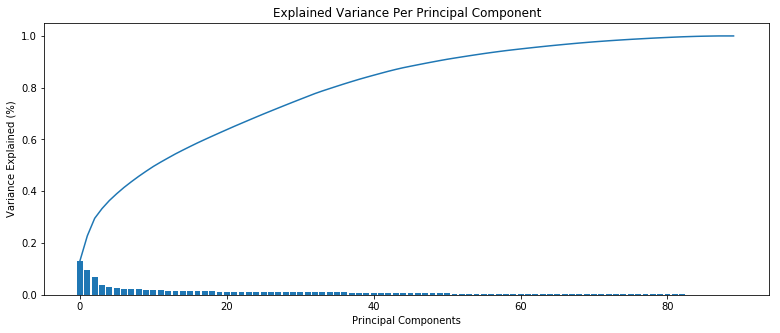

In [13]:
plot_pca(principal)

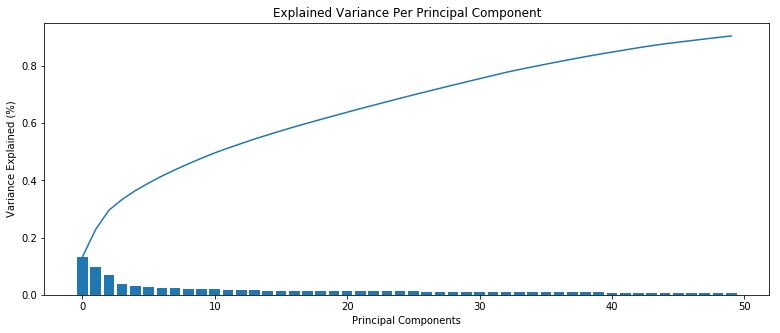

In [14]:
# Re-apply PCA to the data while selecting for number of components to retain.
principal = PCA(n_components=50)
demographics_2_c50 = principal.fit_transform(demographics_2_scaled)
plot_pca(principal)


In [15]:
principal.explained_variance_ratio_.sum()

0.9046999176832118

In [16]:
demographics_2_c50_df = pd.DataFrame(demographics_2_c50)
demographics_2_c50_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2.630246,-3.189874,-3.283670,-0.242154,-1.766297,2.124638,2.413278,-0.251555,-0.582551,0.062024,1.787164,-1.511541,-1.078255,-0.967707,-0.296072,0.132973,0.824697,-1.749741,2.620882,-0.050502,-0.325174,-1.305827,-0.477394,0.992809,0.475683,0.119675,-2.675882,-0.871486,3.041895,-0.717323,10.932986,-1.027879,-1.619267,1.602798,0.138047,-1.447289,0.661048,1.212685,-0.628691,-1.640748,0.309183,0.622261,-0.465388,0.055093,0.298741,-0.521467,0.625819,0.628097,-0.603466,1.180250
1,-0.547240,0.326597,-3.213925,1.482211,-1.360746,0.463838,-1.102977,-0.697761,-0.963255,0.143602,0.414400,-0.638441,-0.592393,1.765887,-2.277521,-0.510033,0.337175,0.528507,0.018525,0.518025,1.376098,0.906445,-0.043400,-1.490063,-0.392395,-0.434023,-0.017095,0.797380,0.057892,0.337717,-0.068090,0.061215,0.204919,1.186731,-1.515779,1.333871,-0.476821,-0.153668,0.035330,-0.714507,1.113001,-0.398089,0.823459,-0.104954,0.834630,-0.169683,-1.658956,-1.412705,0.380029,-1.400794
2,-3.957000,1.804700,-0.662448,-0.884145,-0.187731,0.328663,-0.666329,0.535197,0.525451,-0.462621,-0.484465,0.209983,0.835524,-0.106956,0.450610,-0.824778,0.179489,-0.187873,0.145557,0.029188,0.262153,0.444903,-0.071199,0.411386,-0.196980,-0.209668,-0.029758,-0.447882,0.032947,0.165064,-0.165633,0.467920,0.016440,0.457591,0.125183,-0.144469,-0.326427,0.001969,-1.073534,0.898848,1.496736,-0.562749,-0.710807,0.393948,0.464019,0.624127,-0.565807,0.461350,-0.200126,0.378413
3,1.028306,0.458652,3.324473,1.874343,1.023352,-4.372665,1.984805,-0.608690,-0.433597,-1.117981,-0.304962,-1.426161,-0.924970,0.349723,0.639730,1.320332,-0.375395,-0.189180,-0.758843,1.846746,-1.303555,-1.639902,0.745863,-1.941775,1.146568,-2.502610,0.300034,0.702276,0.584975,0.512801,-0.549364,2.453140,-0.973584,0.090130,-0.398158,0.565400,-0.295978,0.630850,0.110907,1.192083,0.445171,-1.227825,0.091706,-0.318182,0.544212,0.233878,0.223849,0.845005,-0.221768,0.166522
4,-1.525716,-1.483657,-1.233641,-1.781131,-3.740834,0.066449,-0.044619,-0.114589,-1.054713,1.210301,-0.183574,0.894960,-0.948138,-3.619285,1.096471,-0.053462,-0.099156,0.080529,-0.817654,0.533497,0.960358,-0.340474,-0.095309,0.953284,-0.361539,0.166395,0.476503,-0.256933,0.086836,0.125299,-0.008402,-0.639482,0.016515,-1.025345,0.559863,-2.054489,-0.469598,0.649350,-1.211494,0.594826,0.463996,-1.222820,-0.352171,0.338812,1.005536,0.481880,0.739845,-1.540724,0.210440,-0.779738


### Discussion 2.2: Perform Dimensionality Reduction

The initial analysis leaves us with a dataset 798070 rows and 258 features. It turned out to be impossible to do Principal Component Analysis on this set as the notebook kernel died without any error messages while doing the Principal Component Analysis.

Due to this, has the dataframe cleaning function been modified to drop the mixed-categories alltogether. We are then left with a dataset with 798070 rows and 90 features. This dataset can be used for a successful PCA.

The PCA of the dataset, and the according explained variance ratio, show that approximately 50 features will cover a large percentage of the variance. With 50 features the Principal Component Analysis show us that we get an explained variance ratio of 90%.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [17]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def get_weights(pca, component):
    result = pd.DataFrame(pca.components_, columns=list(demographics_1.columns))
    weights = result.iloc[component].sort_values(ascending=False)
    return weights


In [18]:
print(get_weights(principal,0).head(),"\n\n",get_weights(principal,0).tail())

PLZ8_ANTG3            0.230626
PLZ8_ANTG4            0.223650
ORTSGR_KLS9           0.207646
EWDICHTE              0.204192
HH_EINKOMMEN_SCORE    0.188071
Name: 0, dtype: float64 

 KBA05_GBZ         -0.211916
PLZ8_BAUMAX_1.0   -0.217227
KBA05_ANTG1       -0.217562
PLZ8_ANTG1        -0.228604
MOBI_REGIO        -0.234607
Name: 0, dtype: float64


In [20]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print(get_weights(principal,1).head(),"\n""\n",get_weights(principal,1).tail())


ALTERSKATEGORIE_GROB    0.276406
FINANZ_VORSORGER        0.247179
SEMIO_ERL               0.240635
SEMIO_LUST              0.191234
RETOURTYP_BK_S          0.164361
Name: 1, dtype: float64 

 FINANZ_UNAUFFAELLIGER   -0.236240
SEMIO_TRADV             -0.244399
SEMIO_PFLICHT           -0.245010
FINANZ_SPARER           -0.256526
SEMIO_REL               -0.271872
Name: 1, dtype: float64


In [21]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print(get_weights(principal,2).head(),"\n""\n",get_weights(principal,2).tail())

SEMIO_VERT           0.346687
SEMIO_SOZ            0.259867
SEMIO_FAM            0.246096
SEMIO_KULT           0.232480
FINANZ_MINIMALIST    0.167421
Name: 2, dtype: float64 

 SEMIO_RAT    -0.221660
SEMIO_KRIT   -0.274708
SEMIO_DOM    -0.314460
SEMIO_KAEM   -0.338198
ANREDE_KZ    -0.369280
Name: 2, dtype: float64


In [22]:
principal.explained_variance_ratio_[:3].sum()

0.2953606386189806

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

#### Table showing weights for the first principal component to correspoinding feature names.
|Label| Explanation | Value |
|----:|:-----------:|:------|
|PLZ8-ANTG3 |Number of 6-10 family houses in the PLZ8 region|0.230626|
|PLZ8_ANTG4 |Number of 10+ family houses in the PLZ8 region |0.223650|
|ORTSGR_KLS9|Size of community                              |0.207646|
|KBA05_GBZ  |Number of buildings in the microcell           |-0.211916|
|PLZ8_BAUMAX_1.0|Most common building type within the PLZ8 region, mainly 1-2 family homes|-0.217227|
|KBA05_ANTG1|Number of 1-2 family houses in the microcell|-0.217562|

#### Table showing weights for the second principal component to corresponding feature names.
|Label| Explanation | Value |
|----:|:-----------:|:------|
|ALTERSKATEGORIE_GROB|Estimated age based on given name analysis|0.276406|
|FINANZ_VORSORGER|Be financially prepared|0.247179|
|SEMIO_ERL|Personality typology event-oriented|0.240635|
|FINANZ_UNAUFFAELLIGER|Financial inconspicuous|-0.236240|
|SEMIO_TRADV|Personality typology tradional-minded|-0.244399|
|SEMIO_PFLICHT| Personality typology dutiful|-0.245010|

#### Table showing weights for the third principal component to corresponding feature names.
|Label| Explanation | Value |
|----:|:-----------:|:------|
|SEMIO_VERT|Personality typology dreamful|0.346687|
|SEMIO_SOZ|Personality typology socially-minded|0.259867|
|SEMIO_FAM|Personality typology family-minded|0.246096|
|SEMIO_RAT|Personality typology rational|-0.221660|
|SEMIO_KRIT|Personality typology critical-minded|-0.274708|
|SEMIO_DOM|dominant-minded|-0.314460|

The three first components explain 30% of the variance. The first component is related to family houses,especially the PLZ8 region.The third component is related to personality traits or typology.

In [24]:
demographic_2_c50_df = pd.DataFrame(demographics_2_c50)
demographic_2_c50_df.to_csv('demographic_c50_df.csv', index=False, sep=';')

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [3]:
demographics_2_c50_df = pd.read_csv('demographic_c50_df.csv',sep=';')

In [18]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans

    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
    
# elbow-method
scores = []
clusters = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
for i in clusters:
    model = KMeans()
    model.fit(demographics_2_c50_df)
    scores.append(abs(model.score(demographics_2_c50_df)))
    print(f'Running Score for  {i} Clusters: {abs(model.score(demographics_2_c50_df)):.3f}')

Running Score for  3 Clusters: 47474497.784
Running Score for  5 Clusters: 47474496.093
Running Score for  7 Clusters: 47474496.696
Running Score for  9 Clusters: 47474507.651
Running Score for  11 Clusters: 47474501.365
Running Score for  13 Clusters: 47474502.347
Running Score for  15 Clusters: 47474500.847
Running Score for  17 Clusters: 47474518.350
Running Score for  19 Clusters: 47474494.678
Running Score for  21 Clusters: 47564997.448
Running Score for  23 Clusters: 47474503.276
Running Score for  25 Clusters: 47474507.346


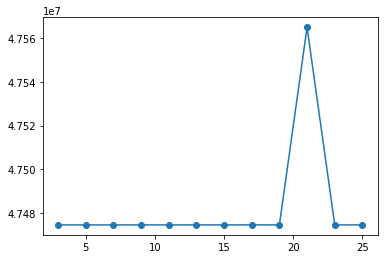

In [19]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(clusters,scores,marker="o")
plt.show()


In [ ]:
sse = {}
clusters = [11, 13, 15, 17, 19, 21,23,25,27,29,31,33,35]
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(demographics_2_c50_df)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [8]:
clusters = [23, 25, 27, 29, 31]
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(demographics_2_c50_df)
    sse[k] = kmeans.inertia_
    

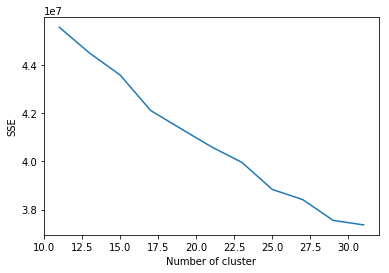

In [9]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
clusters = [33, 35]
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(demographics_2_c50_df)
    sse[k] = kmeans.inertia_

In [ ]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
final_model = KMeans(n_clusters=29)
final_model.fit(demographics_2_c50_df)
predictions = final_model.predict(demographics2_c50_df)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [ ]:
# Load in the customer demographics data.
customers = 

In [ ]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.



### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?



In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.